# Python для аналізу даних

Для початку завантажив необхідні бібліотеки та зробив необхідне форматування, а саме:
* налаштував формат для роботи з датами
* створив дві нові колонки з назвами місяців та днями
* зменшив числа для продажів в 1000 разів, щоб легше сприймались числа на графіках

In [67]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



df = pd.read_csv("customers_behaviour2.csv")
df['order_date'] = pd.to_datetime(df['order_date'])
df['month'] = df['order_date'].dt.strftime('%B')
df['day'] = df['order_date'].dt.strftime('%d')
df['sales'] = df['sales']/1000

df.head()


,order_id,customer_id,order_date,status,delivery_included,sales,full_name,email,phone,region,subscription_to_newsletter,month,day
0,1004584,40782,2023-04-15,Pending,NaN,3.5,Solomiya Hordiyenko,blugardlq@smh.com.au,+86 (603) 146-8094,Odesa,NaN,April,15
1,1008455,40486,2023-04-18,Pending,NaN,1.0,Kuzma Lytvynenko,NaN,+86 (663) 963-3649,Mykolaiv,True,April,18
2,1004993,40879,2023-05-03,Pending,NaN,1.5,Akim Solonin,atuffsof@de.vu,+7 (915) 563-3198,Chernihiv,NaN,May,03
3,1008989,40296,2023-05-13,Pending,NaN,1.0,Serhiy Shapoval,fminkin88@squidoo.com,NaN,Sumy,False,May,13
4,1001763,40022,2023-05-20,Pending,NaN,5.1,Symon Hrytsak,jdumphreym@examiner.com,NaN,Rivne,False,May,20


## Вплив підписки на продажі та кількість замовлень

Зробивши необхідне агрегування видно, що підписка не впливає суттєвим чином на продажі, або кількість замовлень. Різниця зовсім невелика.

In [68]:
#Вплив підписки на кількість замовлень та продажі
subscription_ordersCount = df.groupby('subscription_to_newsletter')['order_id'].nunique()
subscription_sales = df.groupby('subscription_to_newsletter')['sales'].sum()
subscription_merged = pd.merge(subscription_ordersCount, subscription_sales, on='subscription_to_newsletter', how='inner').reset_index()
subscription_merged


,subscription_to_newsletter,order_id,sales
0,False,1829,14286.05
1,True,1796,16982.10


## Статистики по областях

Наші дані охоплюють кожну область України. Знаючи цю інформацію можна дослідити, як виглядали статистики продажів, кількості клієнтів та кількості замовлень по окремих областях.

In [69]:
#Статистики по регіонах(продажі, кількість клієнтів, кількість замовлень)
sales_by_region = df.groupby('region')['sales'].sum()
region_clientsCount = df.groupby('region')['customer_id'].nunique()
merged_df = pd.merge(sales_by_region, region_clientsCount, on='region', how='inner')
region_ordersCount = df.groupby('region')['order_id'].nunique()
merged_df = pd.merge(merged_df, region_ordersCount, on='region', how='inner').reset_index()
merged_df

,region,sales,customer_id,order_id
0,Cherkasy,2514.80,41,243
1,Chernihiv,1469.00,37,203
2,Chernivtsi,2301.10,44,229
3,Dnipropetrovsk,1915.85,32,178
4,Donetsk,1626.60,30,168
5,Ivano-Frankivsk,1217.55,33,162
6,Kharkiv,2224.95,43,230
7,Kherson,1731.30,40,213
8,Khmelnytskyi,2102.85,50,274
9,Kirovohrad,1629.35,35,200


### Розподіл замовлень по областях

Якщо казати про кількість замовлень, лідерами в цій категорії являються такі області: Київська, Хмельницька, Запорізька.

Text(0.5, 0, 'Count of Orders')

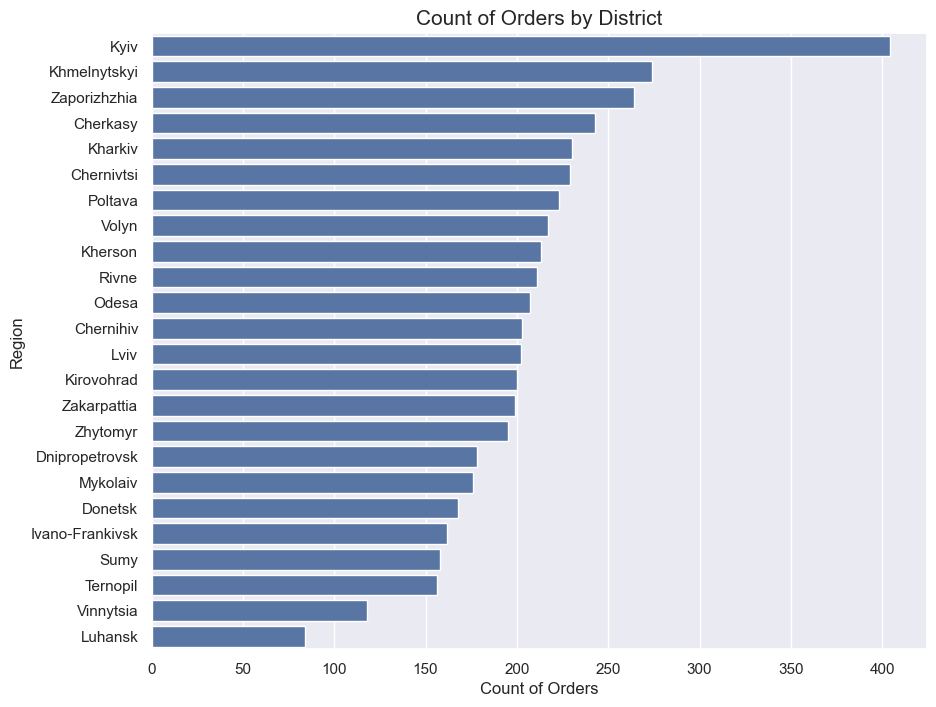

In [70]:
sorted_by_orders = merged_df.sort_values(by='order_id', ascending=False)
plt.figure(figsize=(10,8))
orders_by_district = sns.barplot(data=sorted_by_orders, y='region', x='order_id')
plt.title('Count of Orders by District', fontsize=15)
orders_by_district.set_ylabel('Region')
orders_by_district.set_xlabel('Count of Orders')

### Розподіл продажів по областях

Що стосується продажів, то тут найбільше реалізовано продажів у Києві, Черкасах та Львові.

Text(0.5, 0, 'Sales, K')

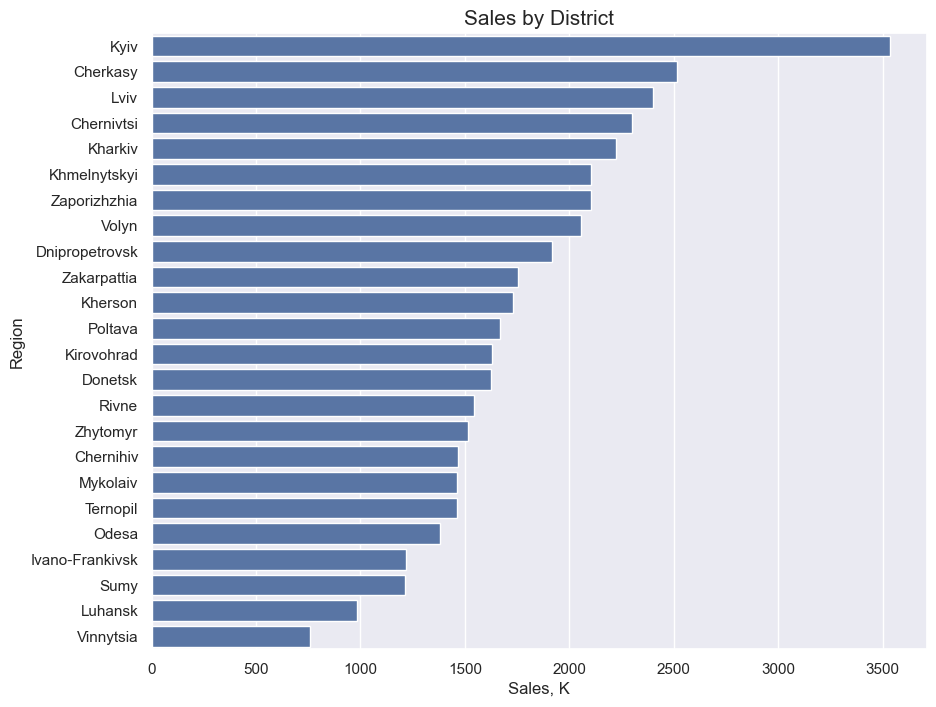

In [71]:
sorted_by_sales = merged_df.sort_values(by='sales', ascending=False)
plt.figure(figsize=(10,8))
sales_by_region = sns.barplot(data=sorted_by_sales, y='region', x='sales')
plt.title('Sales by District', fontsize=15)
sales_by_region.set_ylabel('Region')
sales_by_region.set_xlabel('Sales, K')


### Розподіл кількості клієнтів по областях

За кількістю клієнтів трійка лідерів виглядає наступним чином: Київська область, Хмельницька та Чернівецька.

Text(0.5, 0, 'Count of Customers')

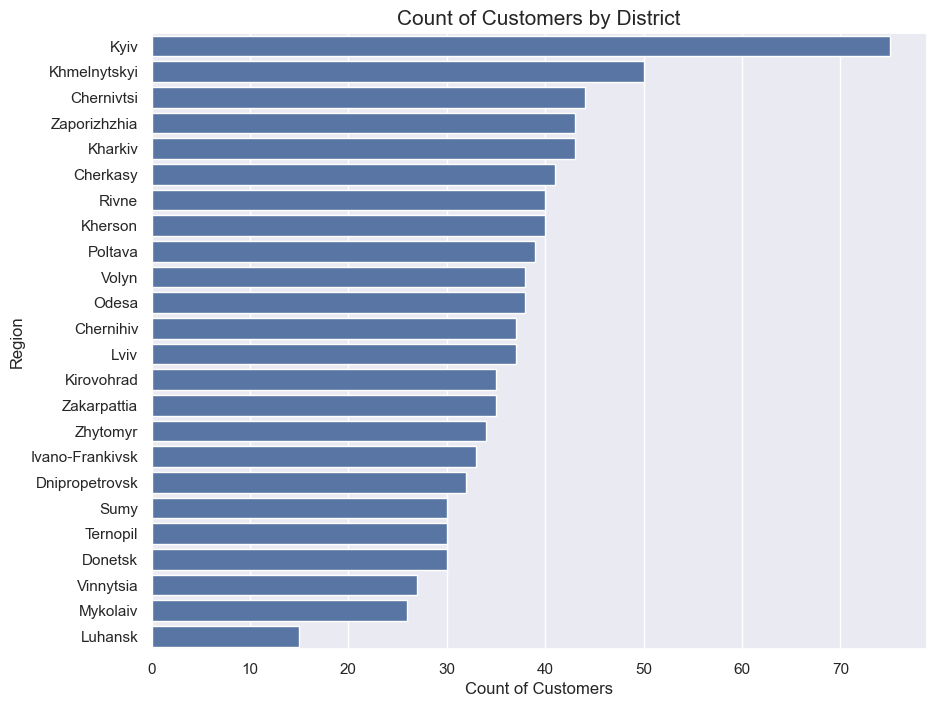

In [72]:
sorted_by_customers = merged_df.sort_values(by='customer_id', ascending=False)
plt.figure(figsize=(10,8))
sorted_by_customers = sns.barplot(data=sorted_by_customers, y='region', x='customer_id')
plt.title('Count of Customers by District', fontsize=15)
sorted_by_customers.set_ylabel('Region')
sorted_by_customers.set_xlabel('Count of Customers')



### Висновки

Бачимо, що за всіма трьома показниками Київська область має найкращі позиції. Цікавим випадком є Львівська область, котра, незважаючи на посередні результати по кількость реалізованих замовлень та клієнтів, знаходиться в топі за показником продажів. Варто придивитись до таких регіонів як Луганськ, де кількість клієнтів є найменшою. За продажами та кількістю замовлень цей регіон також знаходиться на останніх місцях.

## Динаміка продажів з часом

Варто придивитись до активності користувачів у часі. В нашому розпорядженні знаходяться дані за одинадцять місяців 2023-го року, тому "сезонність" за самими сезонами визначити не вдасться. Однак огляд продажів за наявний період дозволить поглянути та зробити певні висновки про активність користувачів в окремі місяці. 

В загальному чітко виділяються пікові значення у січні, березні та вересні. Нижні пікові значення ж фіксуються в лютому, червні та серпні. З 11 місяців спадкова тенденція спостерігається в 7. 

C:\Users\Andrew\AppData\Local\Temp\ipykernel_568\585904083.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  year = sns.lineplot(x=sorted_by_month['month'], y=sorted_by_month['sales'], estimator='sum', ci=None, marker='o')


Text(0.5, 0, '')

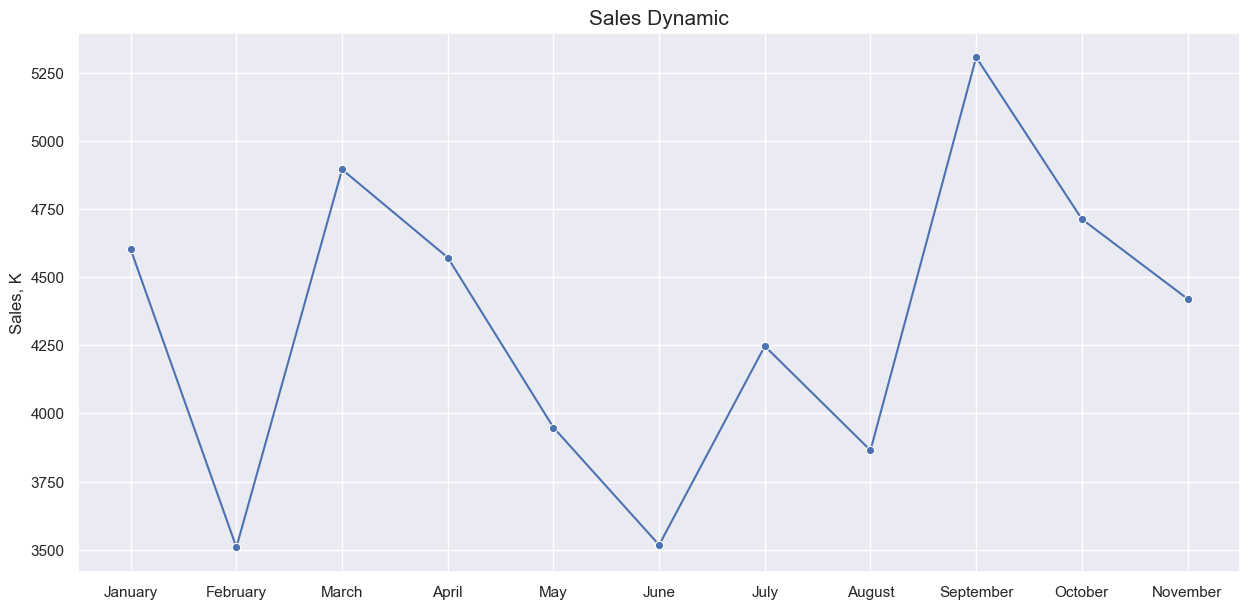

In [73]:
sorted_by_month = df.sort_values(by='order_date', ascending=True)
plt.figure(figsize=(15, 7))
sns.set_theme(style="darkgrid")
year = sns.lineplot(x=sorted_by_month['month'], y=sorted_by_month['sales'], estimator='sum', ci=None, marker='o')
plt.title('Sales Dynamic', fontsize=15)
year.set_ylabel('Sales, K')
year.set_xlabel('')

Поглянувши уважніше на динаміку продажів по місяцям можна помітити, що, на приклад, вересень та жовтень вирізняються з-поміж інших місяців великою кількістю пікової активності, а кінець вересня - найприбутковіший період за всі 11 місяців.

c:\Users\Andrew\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
c:\Users\Andrew\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
c:\Users\Andrew\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
c:\Users\Andrew\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
c:\Users\Andrew\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
c:\Users\Andrew\anac

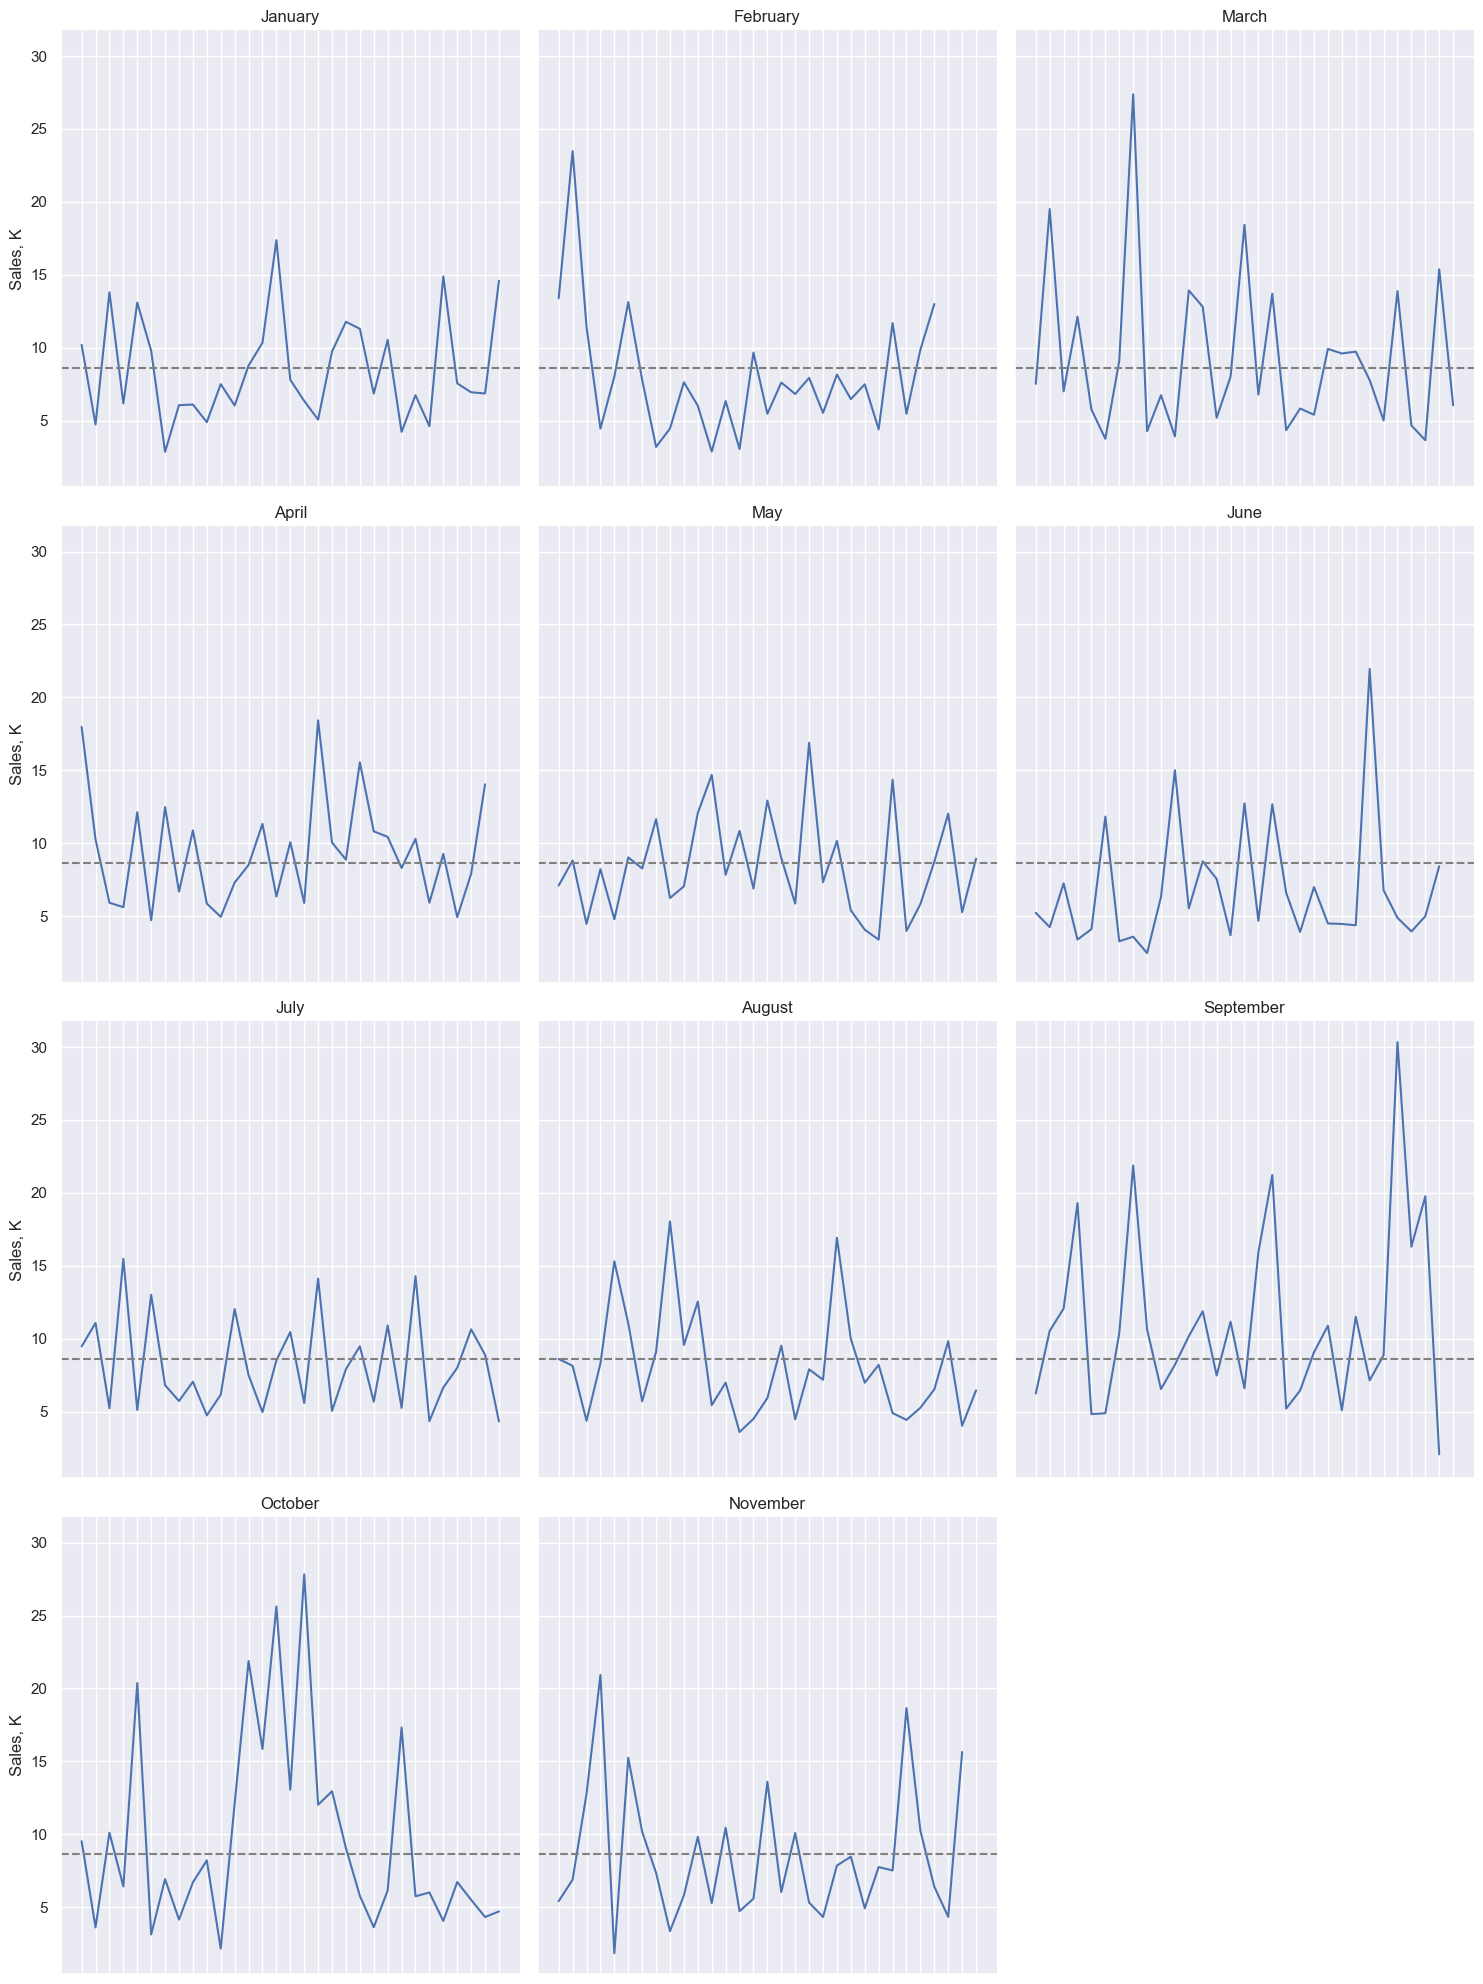

In [74]:
sorted_by_month.month.unique()
sns.set_theme(style="darkgrid")
new = sns.FacetGrid(sorted_by_month, col='month', col_wrap=3, height=5)
new.map_dataframe(sns.lineplot, x='day', y='sales', ci=None)
new.set_xticklabels()
new.set_xlabels('')
new.set_ylabels('Sales, K')
new.set_titles(col_template="{col_name}", row_template="Sales")
new.refline(y=sorted_by_month["sales"].mean())

На загальній хітмапі можна детальніше оглянути продажі за кожен окремий день протягом року. Найкращі показники фіксуються 8 березня, 25 червняб 29 вересня та 24 жовтня. Загалом розподіл щомісяця дуже нерівномірний і після різкого зросту завжди йде різке просідання.

Text(0.5, 1.0, 'Sales Dynamic by Days, 10K')

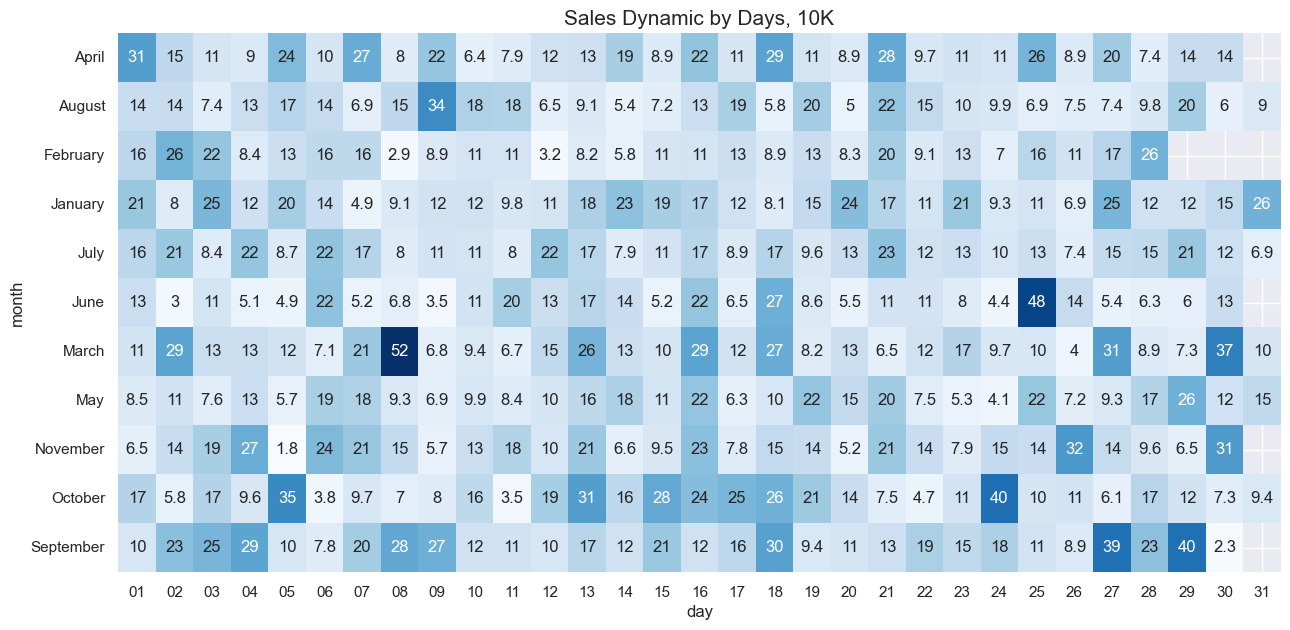

In [77]:
sorted_heatmap = df.sort_values(by='order_date', ascending=True)
sorted_heatmap['sales'] = sorted_heatmap['sales']/10

heatmap_data = sorted_heatmap.pivot_table(
    index='month',
    columns='day',
    values='sales',
    aggfunc='sum'
)
plt.figure(figsize=(15, 7))
sns.heatmap(heatmap_data, cmap='Blues', annot=True, cbar=False, linecolor='black')
plt.title('Sales Dynamic by Days, 10K', fontsize=15)
